In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import pandas as pd 

In [2]:
path = '/Users/jiangtao/Documents/Application/gandaraCenter_20180810/'
#patient characteristics survey data 
pcs = pd.read_csv(path + 'survey_2017.csv')

In [3]:
pcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187192 entries, 0 to 187191
Data columns (total 67 columns):
Survey Year                         187192 non-null int64
Program Category                    187192 non-null object
Region Served                       187192 non-null object
Age Group                           187192 non-null object
Sex                                 187192 non-null object
Transgender                         187192 non-null object
Sexual Orientation                  187192 non-null object
Hispanic Ethnicity                  187192 non-null object
Race                                187192 non-null object
Living Situation                    187192 non-null object
Household Composition               187192 non-null object
Preferred Language                  187192 non-null object
Veteran Status                      187192 non-null object
Employment Status                   187192 non-null object
Number Of Hours Worked Each Week    187192 non-null object
Educa

# At the beginning 

This exploratory analysis summarized the patients characteristic survey dataset obatained from New York State Office of Meantal Health, which consists of 187k rows and 67 features in total. Here are the main aspects we are interested: patients current program, self identification, other health status and financial situations.    

## Program Category Distribution 

The program category distribution shows that about 67.3% patients are on outpatient status, patients in the emergency and in patient status account for the least share, absolute numbers are 3701 and 9282. Look deeper into the seriousness of each patient's status, 91.3% of the patients identify themselves as having serious mental illness. For now, it seems the majority of the patients recognize or being diagonized as having serious mental illness, but over 60% of them are at outpatient status. 

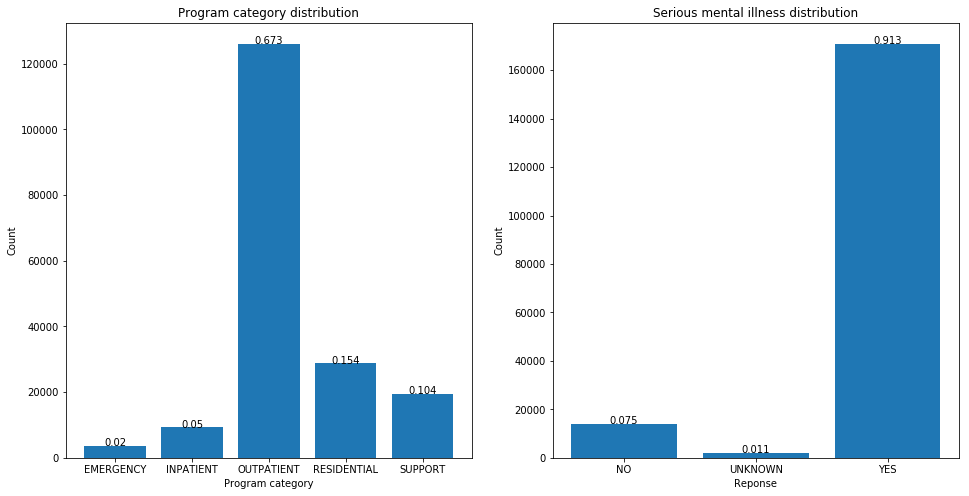

In [5]:
tempCategory = pcs.groupby('Program Category').size()
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,8))

ax1.bar(tempCategory.index, tempCategory.values)
for p, ratio in zip(ax1.patches, [round((x/len(pcs)),3) for x in tempCategory.values]):
    width = p.get_x() + p.get_width() / 2
    height = p.get_height() 
    ax1.text(width, height, ratio, ha='center')
ax1.set_xlabel('Program category')
ax1.set_ylabel('Count')
ax1.set_title('Program category distribution')

tempSerious = pcs.groupby('Serious Mental Illness').size()
ax2.bar(tempSerious.index, tempSerious.values)
for p, ratio in zip(ax2.patches, [round((x/len(pcs)),3) for x in tempSerious.values]):
    ax2.text(p.get_x() + p.get_width()/2,
            p.get_height(),
            ratio,
            ha='center')
ax2.set_xlabel('Reponse')
ax2.set_ylabel('Count')
ax2.set_title('Serious mental illness distribution')
plt.show()

## Patient Self-Identity 

For sex distribution, female and male account for approximately the same share among those patients, with female having a less than 1% higher than male, the absolutely difference is around 1500. As for sexual orientation, 5% of them are bisexual or homosexul, 13% cannot identify themselves and the rest are heterosexual. And around 1% of them responded as transgender. For age information, the ratio between adult and child is 4 to 1 among, which means there is 1 child patient among 5 patients on average. For veteran, 2.64% of them served for the military before. For ethnicity, 22.7% are hispanic, black and white only account for 75% of the total population. For ciminal status, about 10% of them had criminal issues before or ongoing.   
For education status, half of the patients hold degree between middle school and high school, and 26% of them have college or higher degree. As for employment, 67% of the patients are unemployed and not looking for job, only 16% of them are employed.  

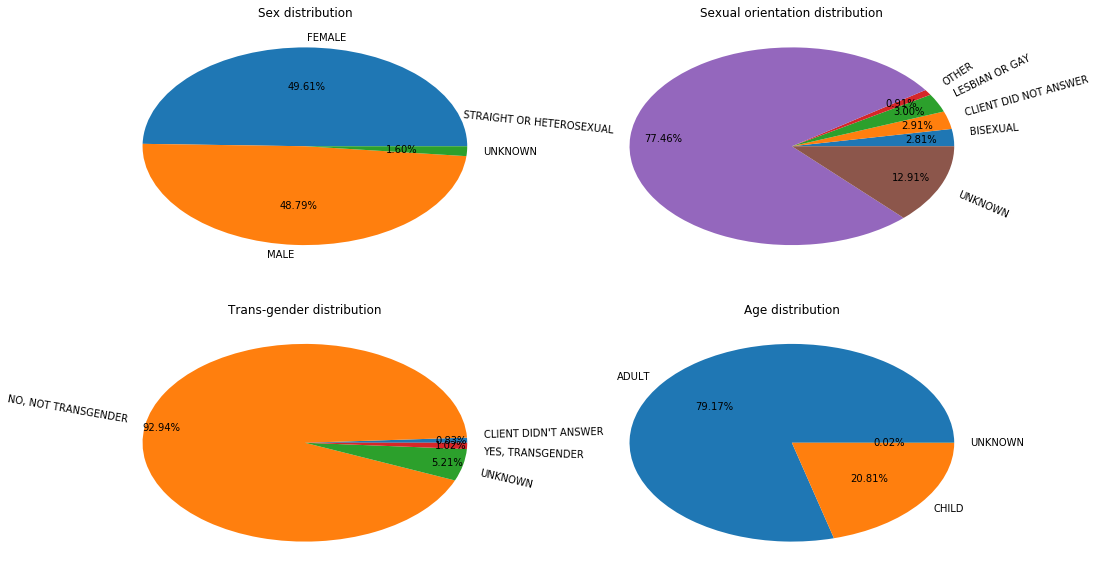

In [25]:
tempAge = pcs.groupby('Age Group').size()
tempSex = pcs.groupby('Sex').size()
tempTrans = pcs.groupby('Transgender').size()
tempOrient = pcs.groupby('Sexual Orientation').size()

plt.figure(figsize=(16,10))
ax1 = plt.subplot(221)
ax1.pie(x=tempSex.values, labels=tempSex.index, autopct='%1.2f%%')
ax1.set_title('Sex distribution')

ax2 = plt.subplot(222)
ax2.pie(x=tempOrient.values, labels=tempOrient.index, autopct='%1.2f%%', pctdistance=0.8, rotatelabels=True)
ax2.set_title('Sexual orientation distribution')

ax3 = plt.subplot(223)
ax3.pie(x=tempTrans.values, labels=tempTrans.index, autopct='%1.2f%%', pctdistance=0.9, rotatelabels=True)
ax3.set_title('Trans-gender distribution')

ax4 = plt.subplot(224)
ax4.pie(x=tempAge.values, labels=tempAge.index, autopct='%1.2f%%')
ax4.set_title('Age distribution')
plt.show()

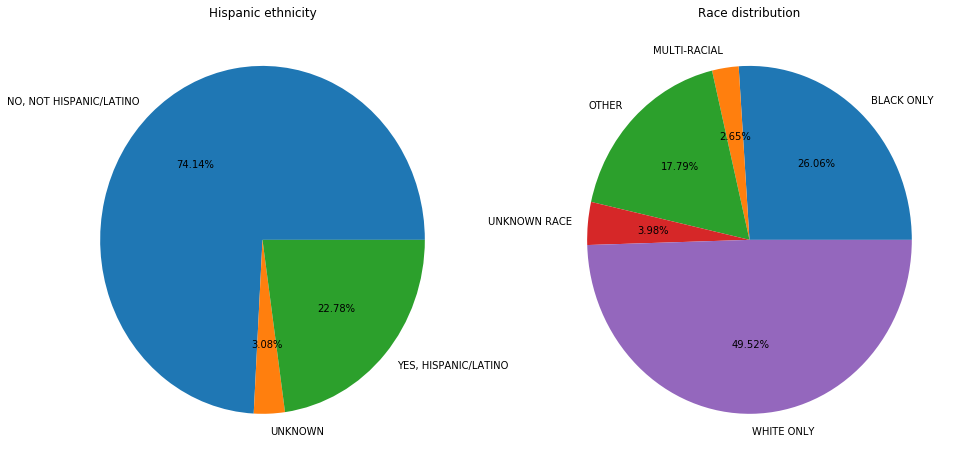

In [9]:
tempHispanic = pcs.groupby('Hispanic Ethnicity').size()
tempRace = pcs.groupby('Race').size()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
ax1.pie(x=tempHispanic.values, labels=tempHispanic.index, autopct='%1.2f%%')
ax1.set_title('Hispanic ethnicity')

ax2.pie(x=tempRace.values, labels=tempRace.index, autopct='%1.2f%%')
ax2.set_title('Race distribution')
plt.show()

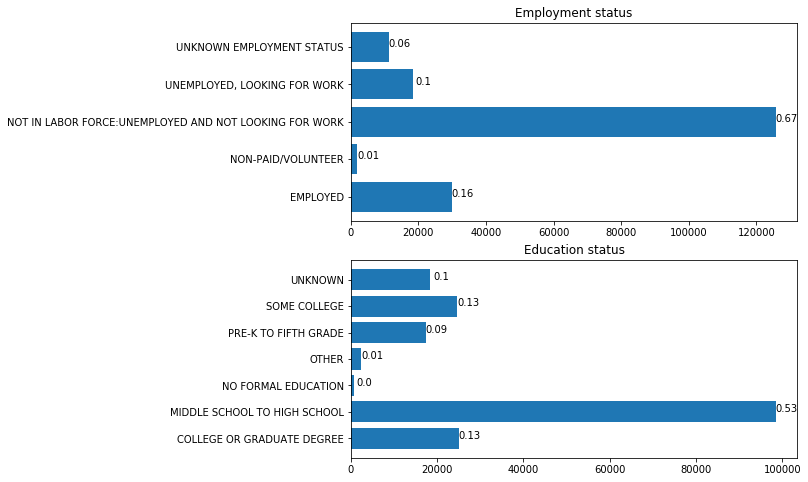

In [12]:
tempEmploy = pcs.groupby('Employment Status').size()
tempEducation = pcs.groupby('Education Status').size()

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,8))
ax1.barh(y=tempEmploy.index, width=tempEmploy.values)
for p, ratio in zip(ax1.patches, [round((x/len(pcs)),2) for x in tempEmploy.values]):
    ax1.text(p.get_width() + max(tempEmploy.values)/40,
            p.get_y() + p.get_height()/2,
            ratio,
            ha='center')
ax1.set_title('Employment status')

ax2.barh(y=tempEducation.index, width=tempEducation.values)
for p, ratio in zip(ax2.patches, [round((x/len(pcs)),2) for x in tempEducation.values]):
    ax2.text(p.get_width() + max(tempEducation.values)/40,
            p.get_y() + p.get_height()/2,
            ratio,
            ha='center'
            )
ax2.set_title('Education status')
plt.show()

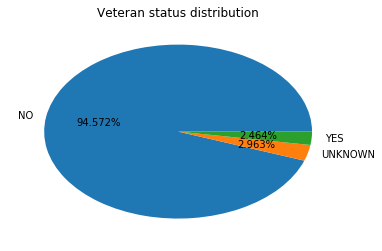

In [593]:
tempVeteran = pcs.groupby('Veteran Status').size()

plt.pie(tempVeteran.values, labels=tempVeteran.index, autopct='%1.3f%%')
plt.title('Veteran status distribution')
plt.show()

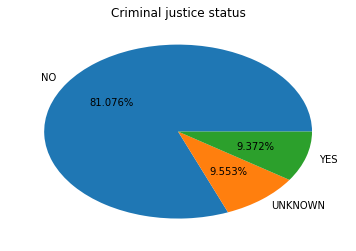

In [13]:
tempCriminal = pcs.groupby('Criminal Justice Status').size()

plt.pie(tempCriminal.values, labels=tempCriminal.index, autopct="%1.3f%%")
plt.title('Criminal justice status')
plt.show()

## Geographic distribution 

The following heat map shows the geographic distribution of those patients across New York State. As we can see New York City and upper NY have high density of those patients. By the way, approximately 10% of the patients are homeless thus not to be shown on the map. 

In [26]:
from uszipcode import ZipcodeSearchEngine
import folium
from folium import plugins
from folium.plugins import HeatMap

search = ZipcodeSearchEngine()

prefix = pcs['Three Digit Residence Zip Code'].unique()
result = []
for i in prefix:
    if i > 199:
        pass
    else:
        zip = search.by_prefix(str(i))
        result.append({i:zip[len(zip)//2]['Zipcode'], 
                       'Lon':zip[len(zip)//2]['Longitude'], 
                       'Lat':zip[len(zip)//2]['Latitude']})
        
tempPop = pcs.groupby('Three Digit Residence Zip Code').size()
for i in result:
    i['Pop'] = tempPop[list(i.keys())[0]]

map = folium.Map(location=[40.742459, -73.971765], zoom_start=6)
data = [[x['Lat'], x['Lon'], x['Pop']] for x in result]
HeatMap(data=data).add_to(map)

map

## Patient health status 

Among those patients, most of them(96.6%) have developmental disabilities, which is very high, and 35.4% of them have at least one of the following chronic disease: Pulmonary Asthma, Alzheimer or Dementia, Kidney Disease, Liver Disease, Endocrine Condition, Neurological Condition, Traumatic Brain Injury, Joint Disease and cancer. This might be the reason that incurred mental illness or worsen mental illness potentally. 

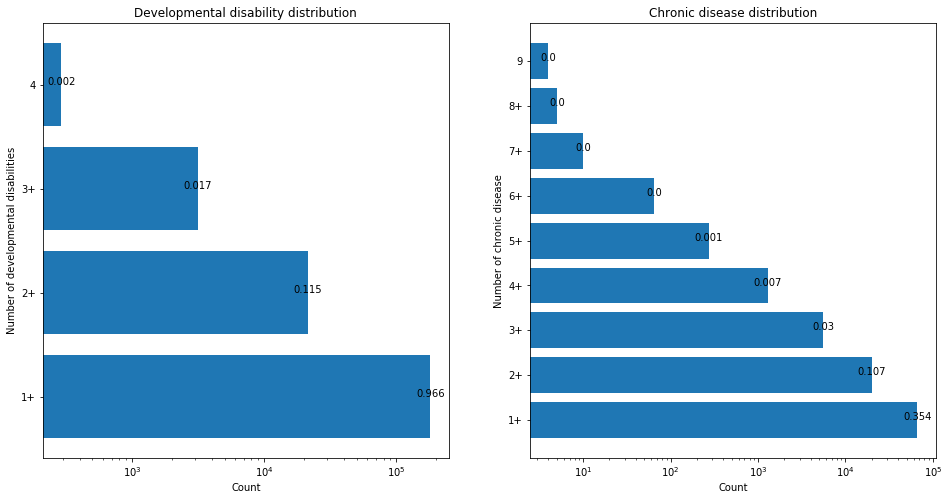

In [15]:
colsDevelop = ['Mental Illness','Intellectual Disability', 
               'Autism Spectrum','Other Developmental Disability']
tempDevelop = pcs[colsDevelop].apply(lambda x: sum([i == 'YES' for i in x]), axis=1)
tempDevelop = tempDevelop.value_counts()

colsChronic = ['Pulmonary Asthma', 'Alzheimer or Dementia', 'Kidney Disease',
               'Liver Disease', 'Endocrine Condition', 'Neurological Condition',
               'Traumatic Brain Injury', 'Joint Disease', 'Cancer','Other Chronic Med Condition']
tempChronic = pcs[colsChronic].apply(lambda x: sum([i == 'YES' for i in x]), axis=1)
tempChronic = tempChronic.value_counts()

bb = sorted(np.cumsum([tempDevelop[i] for i in range(len(tempDevelop)-1,0,-1)]), reverse=True)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,8))
ax1.barh(y=['1+', '2+', '3+', '4'], width=bb)
for p, ratio in zip(ax1.patches, [round((x/len(pcs)), 3) for x in bb]):
    ax1.text(p.get_width(),
            p.get_y() + p.get_height()/2,
            ratio,
            ha='center')
ax1.set_xscale('log')
ax1.set_xlabel('Count')
ax1.set_ylabel('Number of developmental disabilities')
ax1.set_title('Developmental disability distribution')

cc = sorted(np.cumsum([tempChronic[i] for i in range(len(tempChronic)-1,0,-1)]), reverse=True)
ax2.barh(y=['1+', '2+', '3+', '4+', '5+', '6+', '7+','8+','9'], width=cc)
for p, ratio in zip(ax2.patches, [round((x/len(pcs)), 3) for x in cc]):
    ax2.text(p.get_width(),
            p.get_y() + p.get_height()/2,
            ratio,
            ha='center')
ax2.set_xscale('log')
ax2.set_xlabel('Count')
ax2.set_ylabel('Number of chronic disease')
ax2.set_title('Chronic disease distribution')
plt.show()

## Financial situation 

Among all patients, over half(55.6%) of them were receiving at least one kind of cash assistance program, either from government or charity organizations, which indicate the society is working on mental illness issue actually. And most of them(97.4%) have at least one kind of life/health insurance, 58.2% of them have at least 2 insurances. 

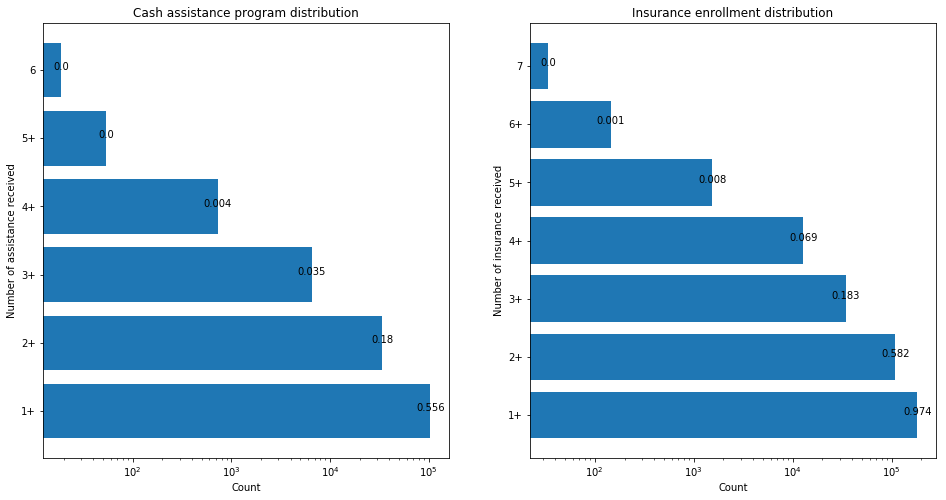

In [16]:
colsCash = ['SSI Cash Assistance','SSDI Cash Assistance', 
            'Veterans Disability Benefits','Veterans Cash Assistance', 
            'Public Assistance Cash Program','Other Cash Benefits']
tempCash = pcs[colsCash].apply(lambda x: sum([i == 'YES' for i in x]), axis=1)
tempCash = tempCash.value_counts()

colsInsurance = ['Medicaid and Medicare Insurance','Unknown Insurance Coverage',
                'Medicaid Insurance','Medicaid Managed Insurance', 
                 'Medicare Insurance', 'Private Insurance',
                 'Child Health Plus Insurance', 'Other Insurance',]
tempInsurance = pcs[colsInsurance].apply(lambda x: sum([i == 'YES' for i in x]), axis=1)
tempInsurance = tempInsurance.value_counts()

bb = sorted(np.cumsum([tempCash[i] for i in range(len(tempCash)-1,0,-1)]), reverse=True)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,8))
ax1.barh(y=['1+', '2+', '3+', '4+', '5+', '6'], width=bb)
for p, ratio in zip(ax1.patches, [round((x/len(pcs)), 3) for x in bb]):
    ax1.text(p.get_width(),
            p.get_y() + p.get_height()/2,
            ratio,
            ha='center')
ax1.set_xscale('log')
ax1.set_xlabel('Count')
ax1.set_ylabel('Number of assistance received')
ax1.set_title('Cash assistance program distribution')


cc = sorted(np.cumsum([tempInsurance[i] for i in range(len(tempInsurance)-1,0,-1)]), reverse=True)
ax2.barh(y=['1+', '2+', '3+', '4+', '5+', '6+', '7'], width=cc)
for p, ratio in zip(ax2.patches, [round((x/len(pcs)), 3) for x in cc]):
    ax2.text(p.get_width(),
            p.get_y() + p.get_height()/2,
            ratio,
            ha='center')
ax2.set_xscale('log')
ax2.set_xlabel('Count')
ax2.set_ylabel('Number of insurance received')
ax2.set_title('Insurance enrollment distribution')
plt.show()